In [3]:
cd ../

/media/daftpunk2/home/jakeoneijk/240429_AudioLDMControlNetInfer


In [4]:
pwd

'/media/daftpunk2/home/jakeoneijk/240429_AudioLDMControlNetInfer'

In [5]:
import numpy as np
import soundfile as sf
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import librosa
import IPython

from AudioLDMControlNetInfer.AudioLDMControlNet import AudioLDMControlNet
from TorchJaekwon.Util.UtilAudioMelSpec import UtilAudioMelSpec
from TorchJaekwon.Util.UtilTorch import UtilTorch
from Util.RMS import RMS

mel_spec_args = {'nfft': 1024, 
                 'hop_size': 160, 
                 'sample_rate': 16000,
                 'mel_size': 128,
                 'frequency_min': 0,
                 'frequency_max': 8000}
mel_spec_util = UtilAudioMelSpec(**mel_spec_args)

audio_ldm_controlnet = AudioLDMControlNet()


/home/jakeoneijk/anaconda3/envs/audioldm_control_infer/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


There is no Hparams
import error: pydub
LatentDiffusionControlRMS: Running in eps-prediction mode


/home/jakeoneijk/anaconda3/envs/audioldm_control_infer/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484810403/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


+ Use extra condition on UNet channel using Film. Extra condition dimension is 512. 
+ Use extra condition on UNet channel using Film. Extra condition dimension is 512. 
DiffusionWrapper has 266.25 M params.
Keeping EMAs of 1024.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels


/home/jakeoneijk/anaconda3/envs/audioldm_control_infer/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jakeoneijk/anaconda3/envs/audioldm_control_infer/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Removing weight norm...
Initial learning rate 1e-05
--> Reload weight of autoencoder from ./AudioLDMControlNetInfer/ModelWeight/vae_mel_16k_64bins.ckpt


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
def scale_rms(rms):
    return UtilTorch.to_np((rms + 0.01) * 1024)

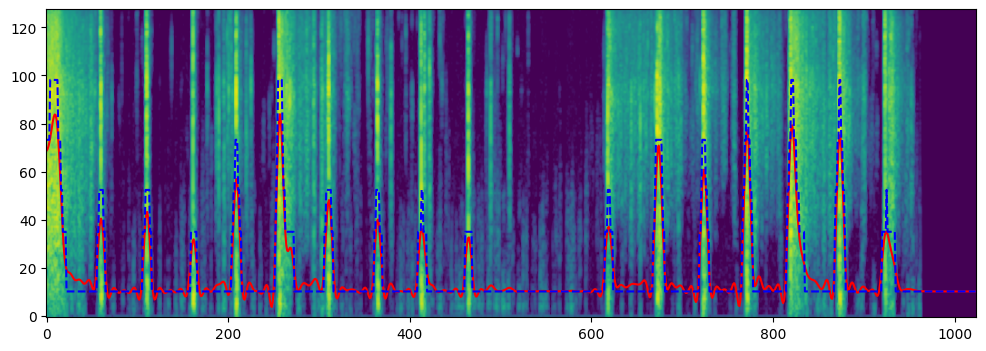

In [8]:
%matplotlib inline
audio_path:str = './ipynb/2015-09-29-15-44-54-782_1.wav'
audio, sr = librosa.load(audio_path, sr=16000)
audio:torch.Tensor = torch.from_numpy(audio).unsqueeze(0) #[1,time]
rms:torch.Tensor = torch.from_numpy(RMS.get_rms_fit_to_audio_ldm_mel(audio=audio)) #[1, time/hop]

discretized_rms:torch.Tensor = RMS.get_discretized_rms(copy.deepcopy(rms), 16)

mel_spec = mel_spec_util.get_hifigan_mel_spec(audio).squeeze(0).numpy()
plt.figure(figsize=(12, 4))
plt.imshow(mel_spec, origin='lower', aspect='auto', cmap='viridis')
plt.plot(scale_rms(rms), 'r')
plt.plot(scale_rms(discretized_rms), 'b--')
plt.show()

In [6]:
IPython.display.Audio(audio, rate=16000)